In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

# Getting data

In [2]:
cat_train_path = "./training_set/cats/"
cat_test_path = "./test_set/cats/"

#training images of cat
cat_train = []
for filename in os.listdir(cat_train_path):
    if filename.endswith(".jpg"):
        img = image.load_img(cat_train_path+filename, target_size=(128, 128))
        cat_train.append(image.img_to_array(img))
cat_train = np.array(cat_train)

#testing images of cat
cat_test = []
for filename in os.listdir(cat_test_path):
    if filename.endswith(".jpg"):
        img = image.load_img(cat_test_path+filename, target_size=(128, 128))
        cat_test.append(image.img_to_array(img))
cat_test = np.array(cat_test)

In [3]:
print("cat_train", cat_train.shape)
print("cat_test", cat_test.shape)

cat_train (4000, 128, 128, 3)
cat_test (1011, 128, 128, 3)


In [4]:
def show_cat_data(X, n=10, title=""):                            
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))   
        ax.get_xaxis().set_visible(False)     
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

In [5]:
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

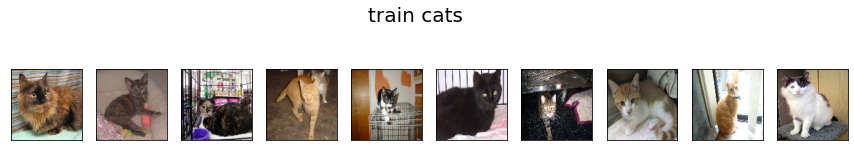

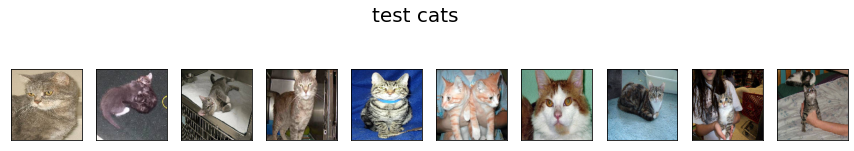

In [6]:
show_cat_data(cat_train, title="train cats")
show_cat_data(cat_test, title="test cats")

In [11]:
cat_train[0][0]

array([[150., 160., 161.],
       [151., 161., 162.],
       [152., 162., 163.],
       [152., 162., 163.],
       [155., 165., 166.],
       [155., 163., 165.],
       [159., 158., 163.],
       [159., 158., 163.],
       [158., 157., 162.],
       [156., 155., 160.],
       [155., 154., 159.],
       [153., 154., 158.],
       [142., 147., 151.],
       [137., 142., 146.],
       [140., 145., 148.],
       [128., 133., 137.],
       [132., 137., 140.],
       [129., 134., 138.],
       [140., 145., 151.],
       [141., 146., 152.],
       [136., 141., 147.],
       [134., 139., 145.],
       [129., 134., 140.],
       [119., 135., 135.],
       [113., 133., 131.],
       [119., 139., 137.],
       [113., 133., 131.],
       [114., 134., 132.],
       [115., 135., 133.],
       [107., 130., 138.],
       [ 96., 120., 132.],
       [ 81., 107., 122.],
       [ 74., 103., 119.],
       [ 72., 103., 121.],
       [ 63.,  98., 118.],
       [ 71., 103., 128.],
       [ 69., 101., 126.],
 

# Data Preprocessing

In [18]:
x_cat_norm = cat_train/255.0
x_cat_norm

x_test_norm = cat_test/255.0
x_test_norm

array([[[[0.77254903, 0.7058824 , 0.59607846],
         [0.7764706 , 0.70980394, 0.6       ],
         [0.77254903, 0.7058824 , 0.59607846],
         ...,
         [0.7921569 , 0.7254902 , 0.62352943],
         [0.8156863 , 0.7490196 , 0.64705884],
         [0.80784315, 0.7411765 , 0.6392157 ]],

        [[0.78431374, 0.7176471 , 0.60784316],
         [0.78039217, 0.7137255 , 0.6039216 ],
         [0.8       , 0.73333335, 0.62352943],
         ...,
         [0.7921569 , 0.7254902 , 0.62352943],
         [0.7882353 , 0.72156864, 0.61960787],
         [0.76862746, 0.7019608 , 0.6       ]],

        [[0.7882353 , 0.72156864, 0.6117647 ],
         [0.7882353 , 0.72156864, 0.6117647 ],
         [0.7764706 , 0.70980394, 0.6       ],
         ...,
         [0.7921569 , 0.7254902 , 0.62352943],
         [0.80784315, 0.7411765 , 0.6392157 ],
         [0.8       , 0.73333335, 0.6313726 ]],

        ...,

        [[0.47058824, 0.43529412, 0.36862746],
         [0.35686275, 0.32156864, 0.25490198]

# Model Building

In [19]:
#building convolutional autoencoder

#encoder
input_layer = Input(shape=(128, 128, 3), name="INPUT")
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer) 
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

#bottleneck layer
latent_layer = MaxPooling2D((2, 2), name="latent_dimension")(x)     

#decoder
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(latent_layer)
x = UpSampling2D((2, 2))(x)

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)



2022-08-17 17:23:52.693448: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-17 17:23:52.712154: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [20]:
cat_AE = Model(input_layer, output_layer)
cat_AE.compile(optimizer='adam', loss='mse')
cat_AE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584   

In [22]:
cat_AE.fit(x_cat_norm, x_cat_norm,
                epochs=20,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test_norm, x_test_norm))

Epoch 1/20
125/125 [==============================] - 84s 426ms/step - loss: 0.0501 - val_loss: 0.0169
Epoch 2/20
125/125 [==============================] - 48s 388ms/step - loss: 0.0145 - val_loss: 0.0136
Epoch 3/20
125/125 [==============================] - 51s 409ms/step - loss: 0.0123 - val_loss: 0.0112
Epoch 4/20
125/125 [==============================] - 57s 460ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 5/20
125/125 [==============================] - 47s 373ms/step - loss: 0.0097 - val_loss: 0.0096
Epoch 6/20
125/125 [==============================] - 42s 338ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 7/20
125/125 [==============================] - 43s 343ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/20
125/125 [==============================] - 42s 337ms/step - loss: 0.0086 - val_loss: 0.0087
Epoch 9/20
125/125 [==============================] - 44s 351ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 10/20
125/125 [==============================] - 43s 342ms/step - l

# Encoding 

In [24]:
encoded_cat = Model(inputs=cat_AE.input, outputs=cat_AE.get_layer("latent_dimension").output)

In [25]:
encoded_cat = encoded_cat.predict(cat_test)

encoded_cat = encoded_cat.reshape((len(cat_test), 16*16*8))
encoded_cat.shape

(1011, 2048)

# Reconstruction

In [26]:
reconstructed_cats = cat_AE.predict(cat_test)

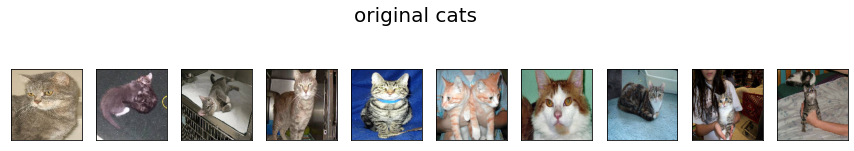

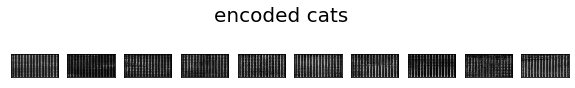

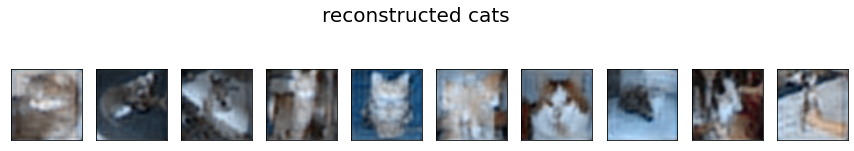

In [27]:
show_cat_data(cat_test, title="original cats")
show_data(encoded_cat, height=32, width=64, title="encoded cats")
show_cat_data(reconstructed_cats, title="reconstructed cats")